In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pytorch_lightning as pl
import torch
import torch.nn as nn
import torch.utils.data as data
from torchdyn.core import NeuralODE
from torchdyn.nn import DataControl, DepthCat, Augmenter, GalLinear, Fourier
from torchdyn.datasets import ToyDataset
# from torchdyn.utils import 

In [24]:
n_samp = 512
dset_type = "moons"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [25]:
class Learner(pl.LightningModule):
    def __init__(self, t_span: torch.Tensor, model: nn.Module):
        super().__init__()
        self.model, self.t_span = model, t_span

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        pass

    def configure_optimizers(self):
        pass

    def train_dataloader(self):
        pass

In [21]:
dset = ToyDataset()
X, yn = dset.generate(n_samples=n_samp, dataset_type=dset_type, noise=0.1)
df = pd.DataFrame({"x1": X[:, 0], "x2": X[:, 1], "lab": yn})

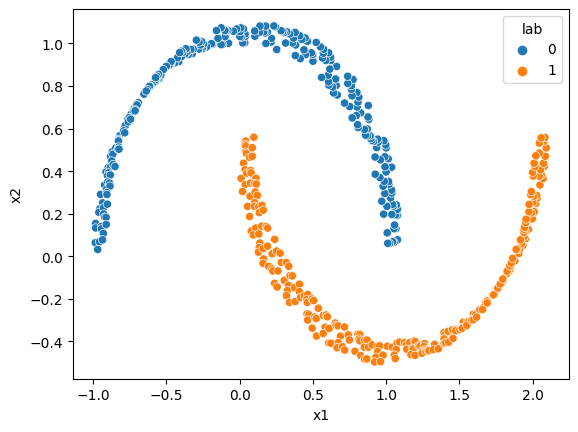

In [22]:
sns.scatterplot(df, x="x1", y="x2", hue="lab")
plt.show()

In [23]:
X_train = torch.Tensor(X).to(device)
y_train = torch.LongTensor(yn.long()).to(device)
train = data.TensorDataset(X_train, y_train)
trainloader = data.DataLoader(train, batch_size=len(X), shuffle=True)